<center>
<hr>
<h1>Complessità nei sistemi sociali</h1>
<h2>Laurea Magistrale in Fisica Dei Sistemi Complessi</h2>
<h2>A.A. 2019/20</h2>
<h2>Daniela Paolotti & Michele Tizzoni</h2>
<h3>Notebook 6 - Epidemic modeling, deterministic and stochastic models.</h3>
<hr>
</center>

In [1]:
import networkx as nx
import numpy as np
from operator import itemgetter
from collections import defaultdict

import seaborn as sns


Bad key "axes.titlelocation" on line 298 in
/Users/Michele/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# The deterministic SIR model

As a first step, we solve the differential equations of an SIR model with the Euler method. 

We set the parameters of the model

In [3]:
mu=0.2
R0=3.0
beta1=R0*mu

In [4]:
beta1

0.6000000000000001

In [5]:
print("The average infectious period is ", 1./mu, " days")

The average infectious period is  5.0  days


The time step of integration is 1 day.

In [6]:
N=10000
I=10
S=N-I
R=0
    
St=[]
It=[]
Rt=[]

deltaSt=[]
deltaIt=[]

St.append(S)
It.append(I)
Rt.append(R)

while I>0.01:
    
    deltaSI=beta1*float(I)*S/N
    
    deltaIR=mu*I
    
    S=S-deltaSI
    I=I+deltaSI-deltaIR
    R=R+deltaIR
    
    deltaSt.append(deltaSI)
    deltaIt.append(deltaIR)
    St.append(S)
    It.append(I)
    Rt.append(R)

In [7]:
print("The final attack rate is ", Rt[-1]/N)

The final attack rate is  0.9532865500506723


We plot the time varying curves of S, I and R

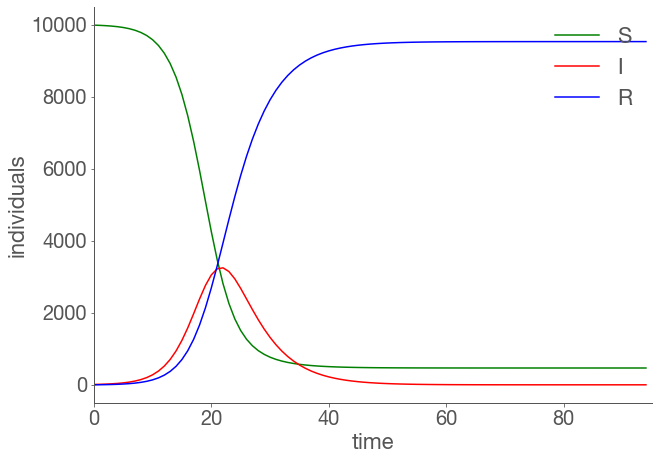

In [8]:
plt.figure(figsize=(10,7))

plt.plot(range(0, len(St)),np.array(St), label='S', color='g')
plt.plot(range(0, len(It)),np.array(It), label='I', color='r')
plt.plot(range(0, len(Rt)),np.array(Rt), label='R', color='b')

#plt.yscale('log')
plt.xlim([0,len(It)])

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('time', fontsize=22)
plt.ylabel('individuals', fontsize=22)

plt.legend(loc='upper right', fontsize=22)

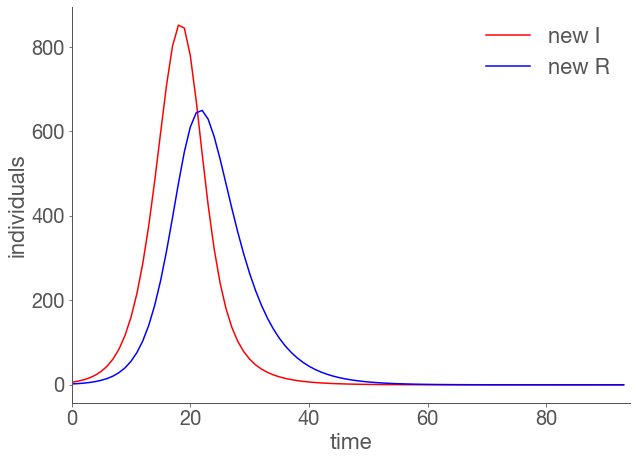

In [10]:
plt.figure(figsize=(10,7))

plt.plot(range(0, len(deltaSt)),np.array(deltaSt), label='new I', color='r')
plt.plot(range(0, len(deltaIt)),np.array(deltaIt), label='new R', color='b')
#plt.plot(range(0, len(Rt)),np.array(Rt), label='R', color='b')

#plt.yscale('log')
plt.xlim([0,len(deltaIt)])

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('time', fontsize=22)
plt.ylabel('individuals', fontsize=22)

plt.legend(loc='upper right', fontsize=22)

In [11]:
It[35]

551.7403754291474

In [12]:
deltaSt[35]

18.850366827912886

# The stochastic SIR

We simulate a discrete and stochastic SIR model by randomly extracting the transition elements at each time step.
Since the simulations are stochastic, we need to run several realizations of the model and then extract their statistical averages.

We use the same model's parameters: $R_0=2.0$

In [13]:
mu=0.2
R0=3.0
beta1=R0*mu

In [14]:
dict_I=defaultdict(list) #here we store the number of I at each time step, for each run

In [15]:
final_R=[]

nrun=1000

Irun=[]

for r in range(0,nrun):

    #for each run r, we set the initial conditions  
    N=10000
    I=10
    S=N-I
    R=0
    
    list_I=[]
    list_I.append(I)

    t=0
    dict_I[t].append(I)
    
    while I>0:
        
        p=beta1*(float(I)/N)
        deltaSI=np.random.binomial(S,p)
        
        deltaIR=np.random.binomial(I,mu)
        
        S=S-deltaSI
        I=I+deltaSI-deltaIR
        R=R+deltaIR
        
        t+=1
        list_I.append(I)
        
        dict_I[t].append(I)
    
    final_R.append(float(R)/N)
    Irun.append(list_I)

print("The average final attack rate is ", np.average(np.array(final_R)))

The average final attack rate is  0.9531658


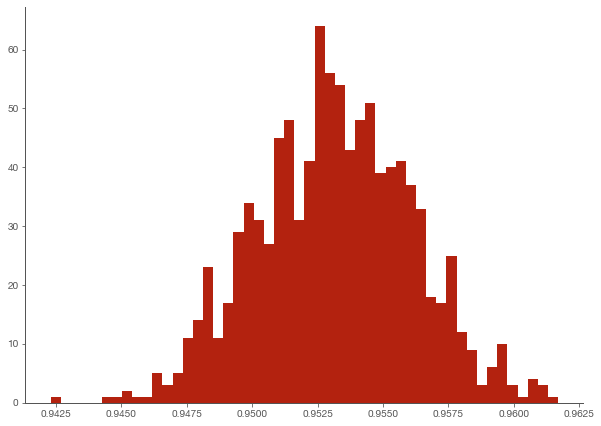

In [18]:
plt.figure(figsize=(10,7))
a=plt.hist(final_R, bins=50)

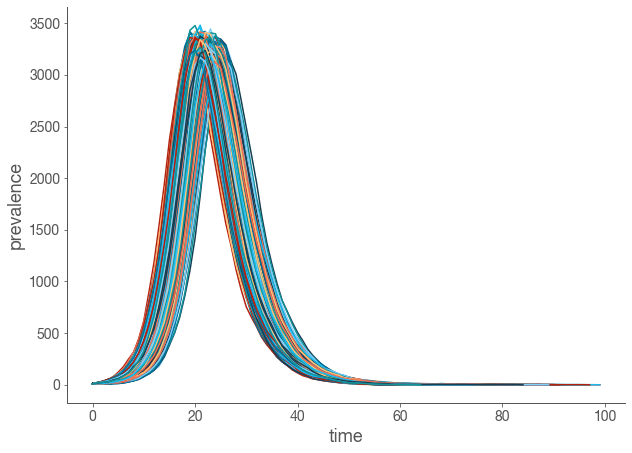

In [19]:
plt.figure(figsize=(10,7))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('time', fontsize=18)
plt.ylabel('prevalence', fontsize=18)

for r in Irun: 

    plt.plot(range(0,len(r)),r)
    

Too many lines are messy... let's draw a boxplot

In [20]:
import matplotlib.ticker as ticker

(15, 25)

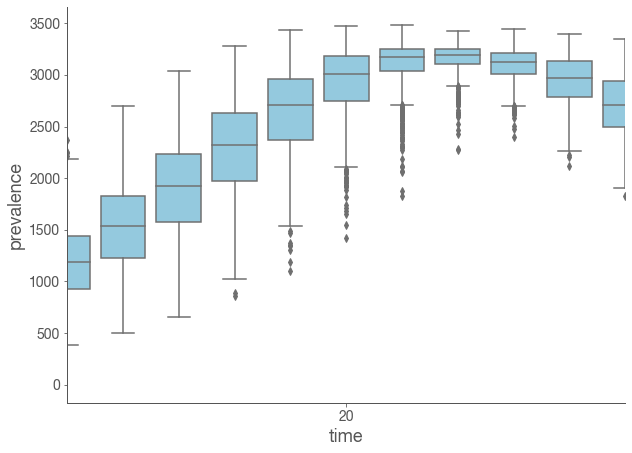

In [22]:
full_array=[np.array(dict_I[t]) for t in dict_I]

plt.figure(figsize=(10,7))

plt.xlabel('time', fontsize=18)
plt.ylabel('prevalence', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax=sns.boxplot(data=full_array, color='skyblue')

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.xlim([15, 25])
#plt.show()

Let's compare the result with the deterministic simulation by computing the average prevalence of the stochastic version.


In [23]:
full_average=[np.average(np.array(dict_I[t])) for t in dict_I]

(5, 20)

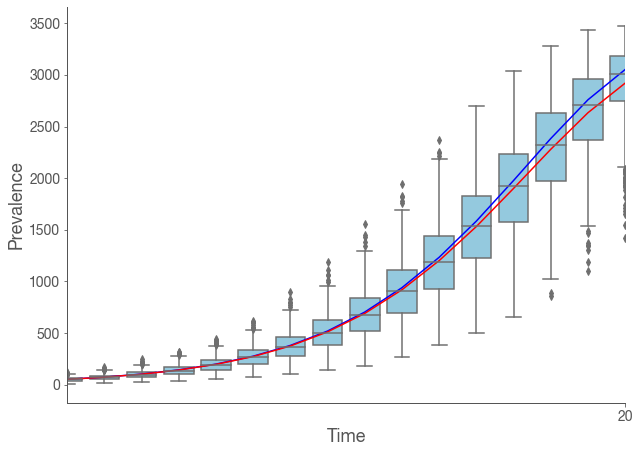

In [31]:
plt.figure(figsize=(10,7))

plt.xlabel('Time', fontsize=18)
plt.ylabel('Prevalence', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax=sns.boxplot(data=full_array, color='skyblue')

plt.plot(range(0,len(It)),It,color='b') 
plt.plot(range(0,len(full_average)),full_average,color='r')

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.xlim([5,20])
#plt.show()

## Dependence on the initial conditions

The results of the stochastic version of the model depend on the initial conditions. 
Let's change the initial number of infected individuals to 1.

In [33]:
mu=0.2
R0=3.0
beta1=R0*mu

In [34]:
dict_I=defaultdict(list)#here we store the number of I at each time step, for each run

final_R=[]

nrun=1000
Irun=[]
for r in range(0,nrun):

    #for each run r, we set the initial conditions  
    N=10000
    I=1  
    S=N-I
    R=0
    
    list_I=[]

    t=0
    dict_I[t].append(I)
    while I>0:
        
        p=beta1*(float(I)/N)
        deltaSI=np.random.binomial(S,p)
        
        deltaIR=np.random.binomial(I,mu)
        
        S=S-deltaSI
        I=I+deltaSI-deltaIR
        R=R+deltaIR
        
        t+=1
        list_I.append(I)
        
        dict_I[t].append(I)
    
    final_R.append(float(R)/N)
    Irun.append(list_I)

print("The average final attack rate is ", np.average(np.array(final_R)))

The average final attack rate is  0.6872212


#### With only 1 infected as a seed, we see more fluctuations, as expected.

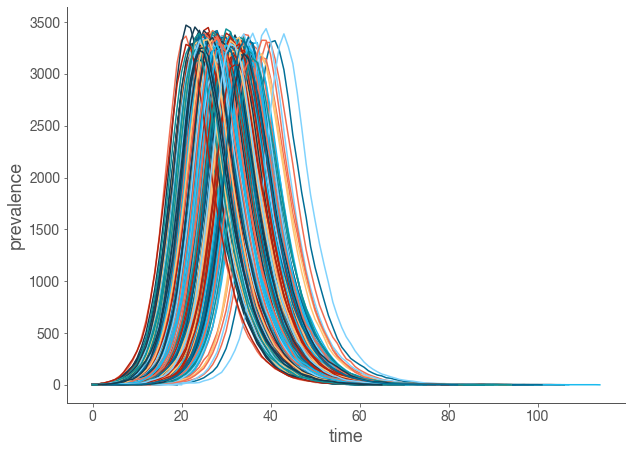

In [35]:
plt.figure(figsize=(10,7))
plt.xlabel('time', fontsize=18)
plt.ylabel('prevalence', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

for r in Irun: 

    plt.plot(range(0,len(r)),r)
    

#### We have several runs without outbreak! 
The initial seed individual recovers before infecting someone else.

In [37]:
no_outbreak=[]
for r in final_R:
    if r<0.8:
        no_outbreak.append(r*10000)
print(no_outbreak)

[1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 4.0, 10.0, 2.9999999999999996, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.9999999999999996, 1.0, 2.9999999999999996, 5.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 7.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.9999999999999996, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.9999999999999996, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 4.0, 1.0, 2.9999999999999996, 1.0, 4.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 5.0, 1.0, 1.0, 1.0, 1.0, 2.9999999999999996, 2.0, 1.0, 2.0, 1.0, 4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.9999999999999996, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.9999999999999996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.9999999999999996, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 18.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.9999999999999996, 1.0, 2.0, 2.0, 1.0, 2.99999

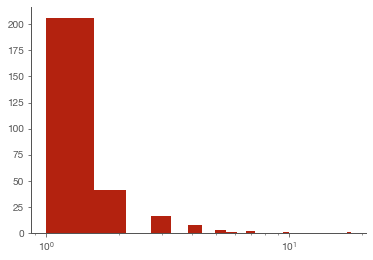

In [38]:
b=plt.hist(no_outbreak, bins=30)
plt.xscale('log')

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 <a list of 9 Text yticklabel objects>)

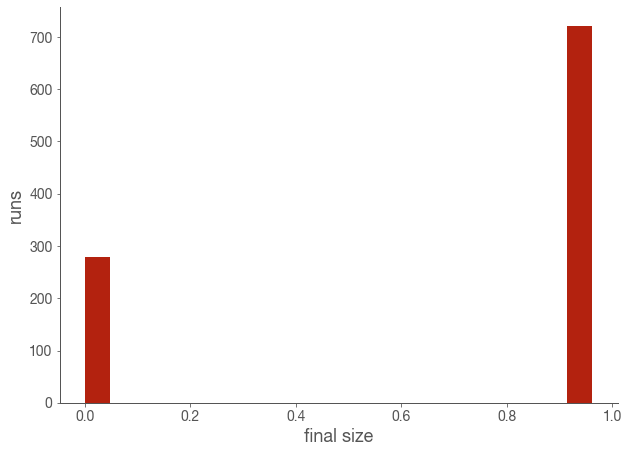

In [39]:
plt.figure(figsize=(10,7))
plt.hist(final_R, 20)
plt.xlabel('final size', fontsize=18)
plt.ylabel('runs', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [40]:
len(no_outbreak)

279

In a stochastic SIR model, the probability of an outbreak is equal to 
<center>
$p_{outb}=1-(\frac{1}{R_0})^{I_0}$
</center>

In [41]:
p_outbreak=1-1/R0

In [42]:
p_outbreak

0.6666666666666667

Of course, such fluctuations do not affect the deterministic model, where the outcome is fixed. 

In [43]:
N=10000
I=1
S=N-I
R=0
    

St=[]
It=[]
Rt=[]

St.append(S)
It.append(I)
Rt.append(R)

while I>0.5:
    deltaSI=beta1*(float(I)*float(S)/N)
    deltaIR=mu*I
    
    S=S-deltaSI
    I=I+deltaSI-deltaIR
    R=R+deltaIR
    
    St.append(S)
    It.append(I)
    Rt.append(R)

In [44]:
print("The final attack rate is ", Rt[-1]/N)

The final attack rate is  0.9531700082169579


---
# Stochastic SIR on the US airport network

In [45]:
airport_path='./../network_data/USairport_2010.txt'
meta_path='./../network_data/USairport_2010_codes.txt'

In [46]:
G=nx.Graph()
fh=open(airport_path,'r')
for line in fh.readlines():
    s=line.strip().split()
    G.add_edge(int(s[0]),int(s[1]))
fh.close()  

In [47]:
G.code={}
G.name={}
G.pos={}

lons=[]
lats=[]

finfo=open(meta_path,'r')
finfo.readline()
for line in finfo.readlines():
    s=line.strip().split()
    node=int(s[0])
    
    lon=float(s[4])
    lat=float(s[3])
    
    G.code[node]=s[1]
    G.name[node]=s[2]
    G.pos[node]=[lon,lat]
    
    lons.append(lon)
    lats.append(lat)
finfo.close() 

In [48]:
#disease parameters
mu=0.2#infectious period
lambd=0.01#probability of infection given a contact

In [49]:
#we need to store the disease status of each node
G.disease_status={} #S=0, I=1, R=-1

infected_nodes=[]#list of infected nodes

In [50]:
#let's choose a seed
node_list=[]

deg=dict(G.degree())
for i in sorted(deg.items(), key=itemgetter(1)):
    node_list.append(i[0])
seed=node_list[-1]

print("The seed is", G.name[seed])
print("The degree of the seed is", G.degree(seed))

The seed is Denver
The degree of the seed is 192


In [51]:
#initialize the network
infected_nodes.append(seed)

for n in G.nodes():
    if n in infected_nodes:
        G.disease_status[n]=1
        #infected
    else:
        G.disease_status[n]=0
        #susceptible

In [52]:
I_net=[]

while len(infected_nodes)>0:
    
    #transmission
    for i in infected_nodes:
        for j in G.neighbors(i):
            if G.disease_status[j]==0:
                p=np.random.random()
                if p<lambd:
                    G.disease_status[j]=1
                
    
    #recovery
    for k in infected_nodes:
        p=np.random.random()
        if p<mu:
            G.disease_status[k]=-1
    
    #update of disease status
    infected_nodes=[]
    for n in G.nodes():
        if G.disease_status[n]==1:
            infected_nodes.append(n)
 
    #store output
    I_net.append(len(infected_nodes))

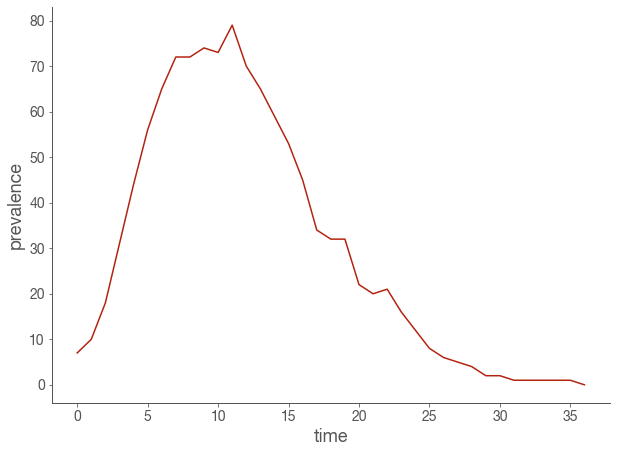

In [53]:
plt.figure(figsize=(10,7))

plt.xlabel('time', fontsize=18)
plt.ylabel('prevalence', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.plot(range(0,len(I_net)),I_net)

In [54]:
recovered=0
for n in G.nodes():
    if G.disease_status[n]==-1:
        recovered+=1

print("The total number of infected nodes is", recovered)
print("The final attack rate is", recovered/len(G.nodes()))
        

The total number of infected nodes is 212
The final attack rate is 0.5234567901234568


## Visualize the infection spread on the network

In [55]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point


In [14]:
shape_path='./../shapefiles/USA_shape.shp'

In [15]:
ls ./../shapefiles/

README.md      USA_shape.dbf  USA_shape.qpj  USA_shape.shx  st99_d00.shp*
USA_shape.cpg  USA_shape.prj  USA_shape.shp  st99_d00.dbf*  st99_d00.shx*


In [16]:
#we need to store the disease status of each node
G.disease_status={} #S=0, I=1, R=-1

infected_nodes=[]#list of infected nodes

In [17]:
#initialize the network
infected_nodes.append(seed)

for n in G.nodes():
    if n in infected_nodes:
        G.disease_status[n]=1
        #infected
    else:
        G.disease_status[n]=0
        #susceptible

In [18]:
t=0
node_color=[G.disease_status[v] for v in G]#color code on disease status

## Import the shapefile of the USA

In [19]:
usa = gpd.read_file(shape_path)

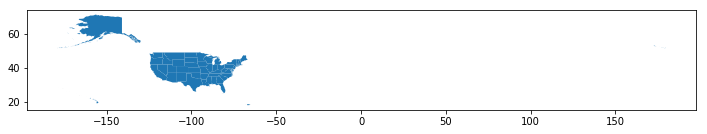

In [20]:
usa.plot(figsize=(12,7))

In [21]:
usa.head()

,AREA,PERIMETER,ST99_D00_,ST99_D00_I,STATE,NAME,LSAD,REGION,DIVISION,LSAD_TRANS,geometry
0,271.25438,227.17142,2,1,02,Alaska,01,4,9,None,POLYGON ((-147.7871108843566 70.24536349411568...
1,0.00375,0.34984,3,2,02,Alaska,01,4,9,None,"POLYGON ((-166.053153 66.264944, -166.03187 66..."
2,0.00150,0.15353,4,3,02,Alaska,01,4,9,None,"POLYGON ((-168.893219 65.744705, -168.898754 6..."
3,0.03130,0.71223,5,4,02,Alaska,01,4,9,None,"POLYGON ((-168.21012 64.99896, -168.207906 65...."
4,0.88934,7.36032,6,5,02,Alaska,01,4,9,None,POLYGON ((-171.7398613127325 63.71712298849418...


In [22]:
usa_cont=usa[(usa.NAME != 'Alaska') & (usa.NAME !='Hawaii') & (usa.NAME != 'Puerto Rico')]

In [23]:
usa_cont.head()

,AREA,PERIMETER,ST99_D00_,ST99_D00_I,STATE,NAME,LSAD,REGION,DIVISION,LSAD_TRANS,geometry
0,271.25438,227.17142,2,1,02,Alaska,01,4,9,None,POLYGON ((-147.7871108843566 70.24536349411568...
1,0.00375,0.34984,3,2,02,Alaska,01,4,9,None,"POLYGON ((-166.053153 66.264944, -166.03187 66..."
2,0.00150,0.15353,4,3,02,Alaska,01,4,9,None,"POLYGON ((-168.893219 65.744705, -168.898754 6..."
3,0.03130,0.71223,5,4,02,Alaska,01,4,9,None,"POLYGON ((-168.21012 64.99896, -168.207906 65...."
4,0.88934,7.36032,6,5,02,Alaska,01,4,9,None,POLYGON ((-171.7398613127325 63.71712298849418...


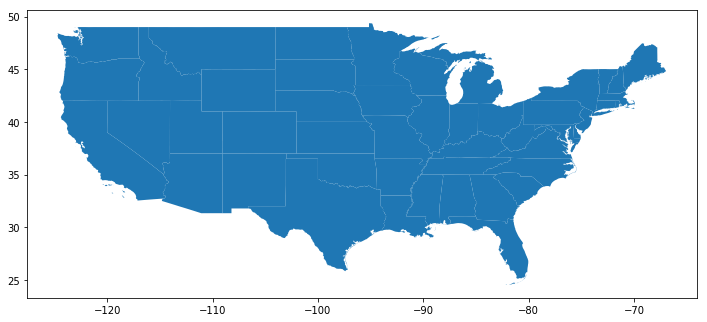

In [24]:
usa_cont.plot(figsize=(12,7))

In [26]:
usa_cont.crs

{'init': 'epsg:4326'}

In [27]:
usa_cont_alb = usa_cont.to_crs({'init': 'esri:102003'})

In [28]:
usa_cont_alb.head()

,AREA,PERIMETER,ST99_D00_,ST99_D00_I,STATE,NAME,LSAD,REGION,DIVISION,LSAD_TRANS,geometry
81,25.53950,31.40718,83,82,27,Minnesota,01,2,4,None,"POLYGON ((62537.91472262501 1302915.951761509,..."
82,20.85358,30.71739,84,83,53,Washington,01,4,9,None,POLYGON ((-1922972.601598165 1549404.889221745...
83,0.00152,0.17436,85,84,53,Washington,01,4,9,None,"POLYGON ((-1979920.979747015 1565781.66002982,..."
84,45.07846,34.97623,86,85,30,Montana,01,4,8,None,POLYGON ((-1474367.320497852 1437639.368676193...
85,24.45683,29.19034,87,86,16,Idaho,01,4,8,None,POLYGON ((-1474367.320497852 1437639.368676193...


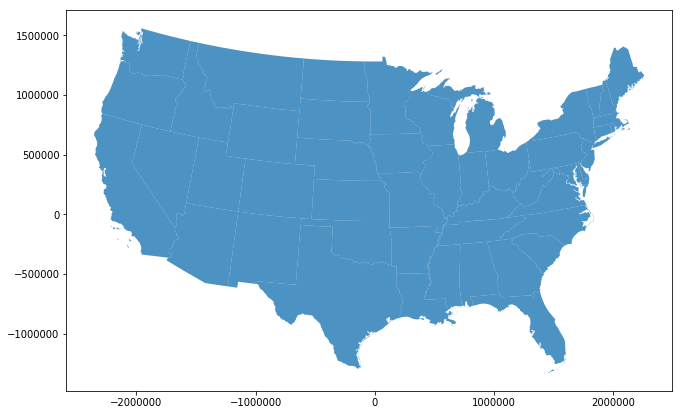

In [29]:
ax=usa_cont_alb.plot(figsize=(12,7), alpha=0.8)

In [30]:
from pyproj import Proj, transform

In [31]:
df = pd.read_csv(meta_path, sep=' ')

In [32]:
df

,id,code,city,lat,lon
0,29,ABE,Allentown,40.654722,-75.438333
1,30,ABI,Abilene,32.409444,-99.679722
2,32,ABQ,Albuquerque,35.041667,-106.606389
3,33,ABR,Aberdeen,45.449722,-98.421667
4,35,ABY,Albany,31.532222,-84.196111
5,38,ACK,Nantucket,41.256667,-70.059722
6,39,ACT,Waco,31.611389,-97.228611
7,40,ACV,Eureka_Arcata,40.979167,-124.107500
8,41,ACY,Atlantic_City,39.456111,-74.578056
9,52,AEX,Alexandria(Intl),31.324167,-92.546944


In [33]:
geo = [Point(xy) for xy in zip(df.lon, df.lat)]
crs={'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geo)

In [34]:
geo_df.crs

{'init': 'epsg:4326'}

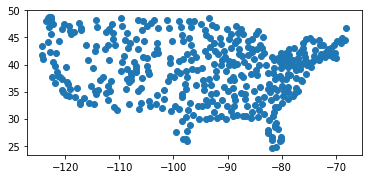

In [35]:
geo_df.plot()

In [36]:
original = Proj(geo_df.crs) # EPSG:4326 in your case
destination = Proj(init='esri:102003') # your new proj

In [37]:
G.pos_new={}
for node in G:
    
    long,lat=G.pos[node]
    x,y = transform(original,destination,long,lat)
    
    G.pos_new[node]=(x,y)

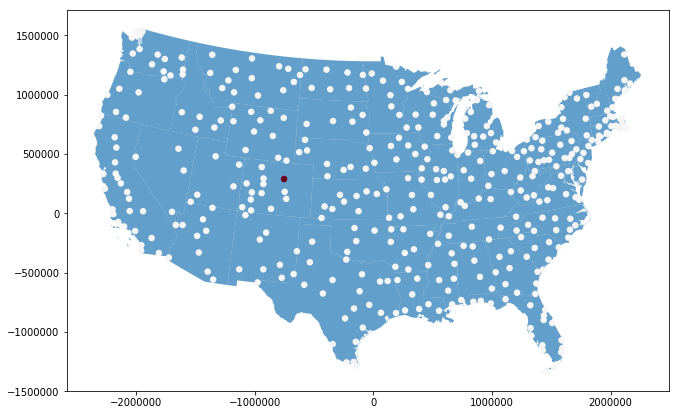

In [38]:
ax=usa_cont_alb.plot(figsize=(12,7), alpha=0.7)
nx.draw_networkx_nodes(G, pos=G.pos_new, node_size=30,node_color=node_color, cmap=plt.cm.RdBu_r, vmin=-1, vmax=1)

/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 864x504 with 0 Axes>

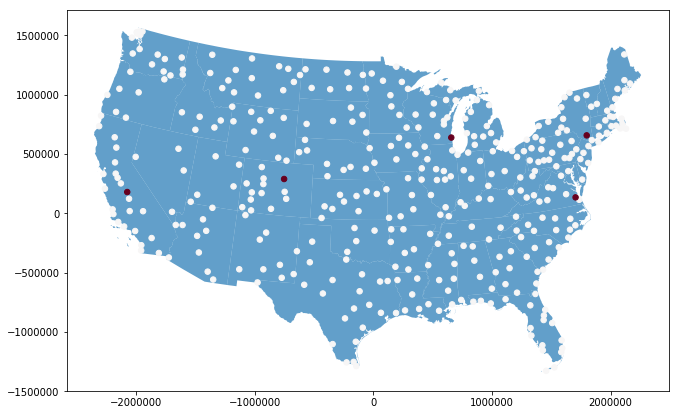

<Figure size 864x504 with 0 Axes>

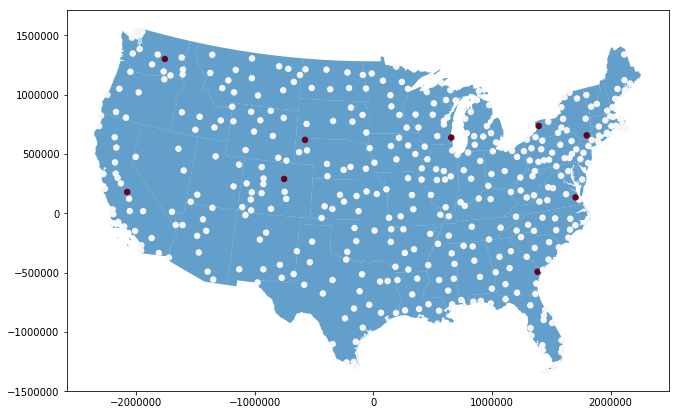

<Figure size 864x504 with 0 Axes>

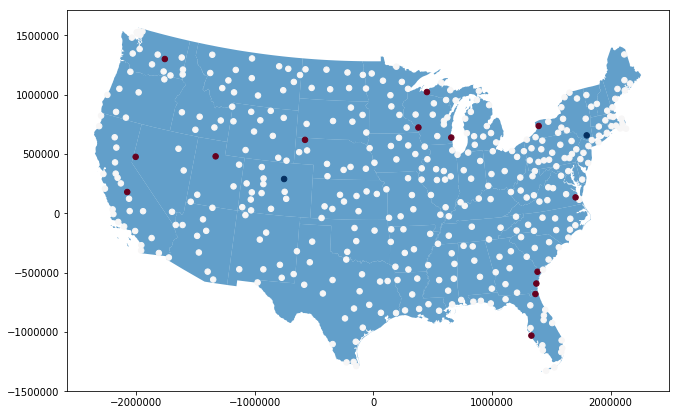

<Figure size 864x504 with 0 Axes>

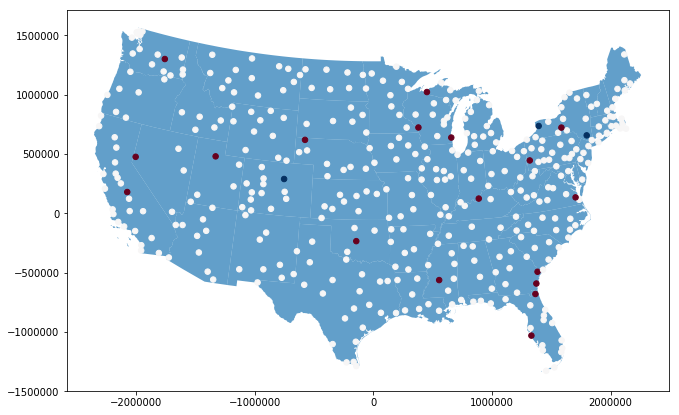

<Figure size 864x504 with 0 Axes>

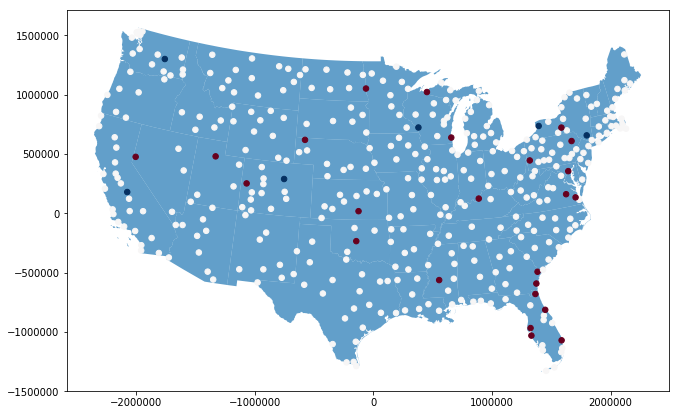

<Figure size 864x504 with 0 Axes>

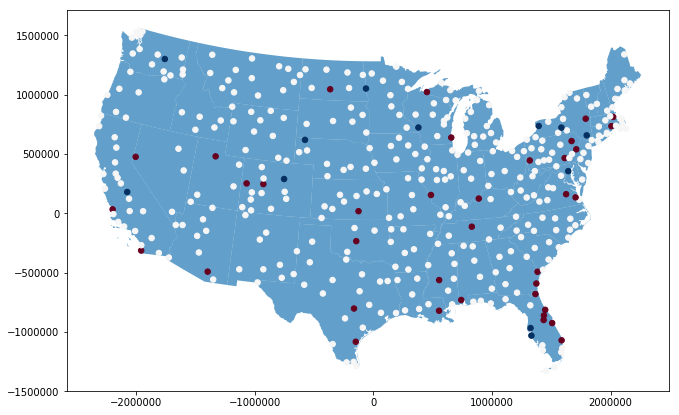

<Figure size 864x504 with 0 Axes>

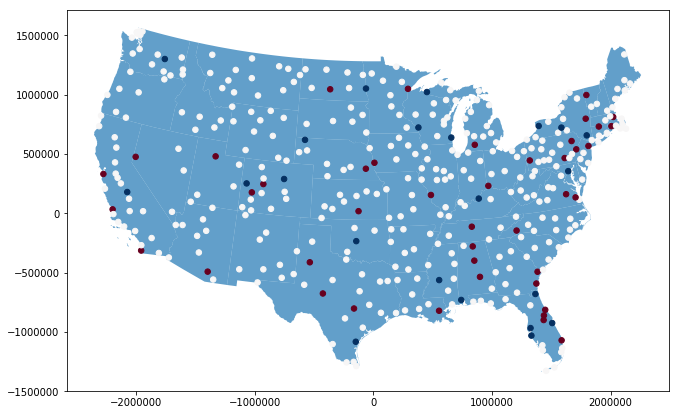

<Figure size 864x504 with 0 Axes>

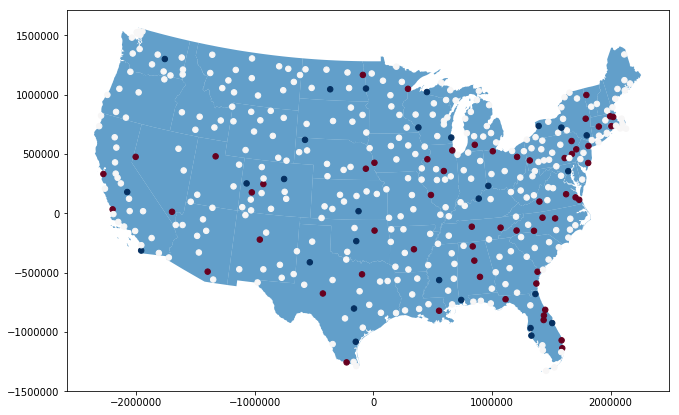

<Figure size 864x504 with 0 Axes>

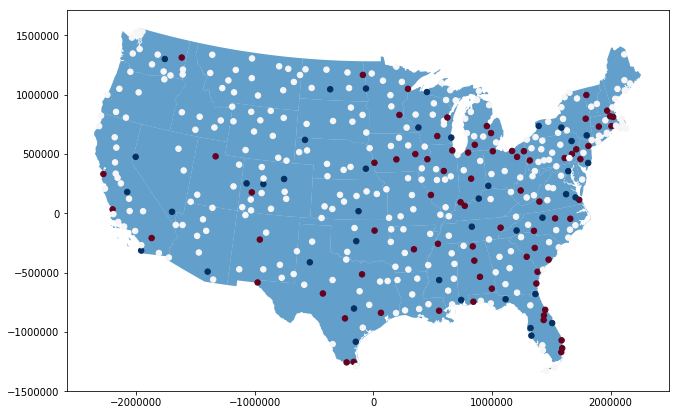

<Figure size 864x504 with 0 Axes>

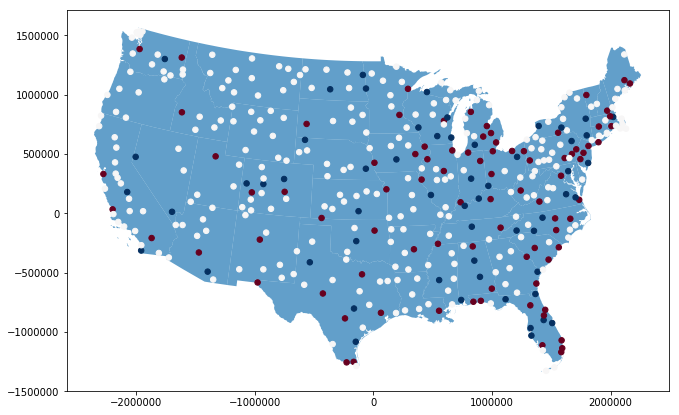

<Figure size 864x504 with 0 Axes>

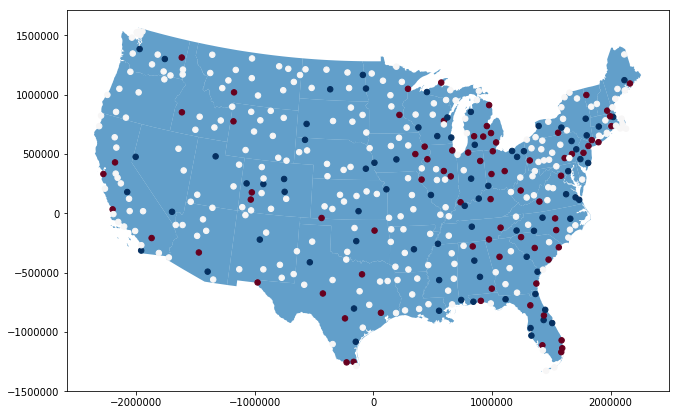

<Figure size 864x504 with 0 Axes>

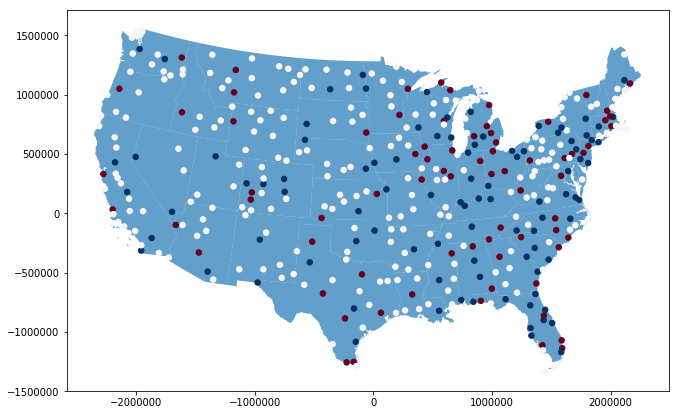

<Figure size 864x504 with 0 Axes>

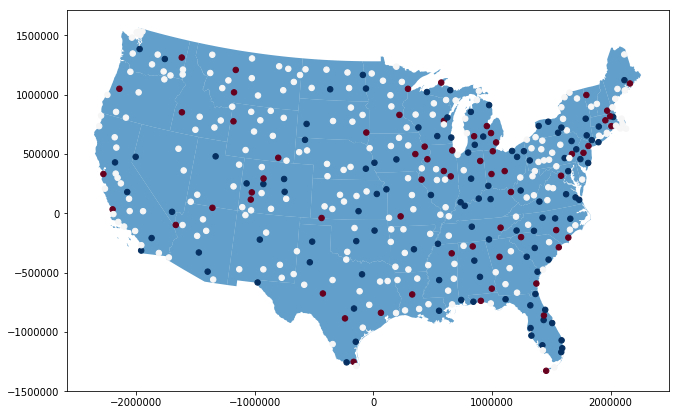

<Figure size 864x504 with 0 Axes>

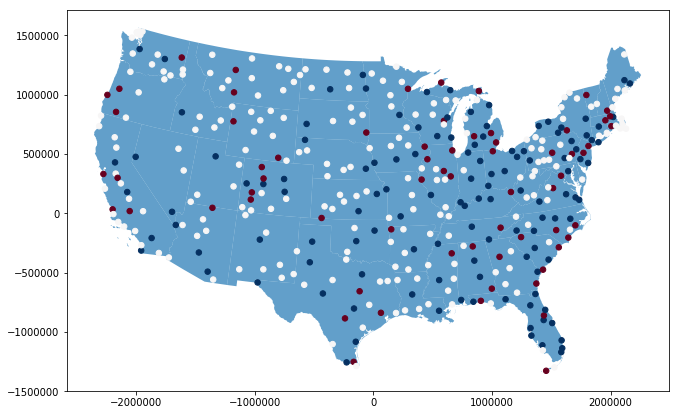

<Figure size 864x504 with 0 Axes>

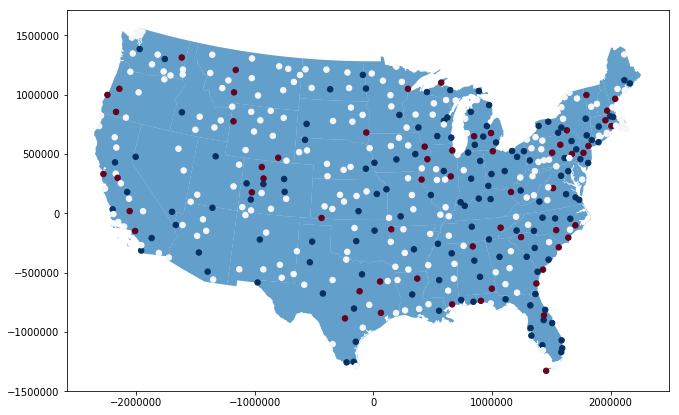

In [39]:
while len(infected_nodes)>0 and t<15:
    
    for i in infected_nodes:
        for j in G.neighbors(i):
            if G.disease_status[j]==0:
                p=np.random.random()
                if p<lambd:
                    G.disease_status[j]=1
                
    for k in infected_nodes:
        p=np.random.random()
        if p<mu:
            G.disease_status[k]=-1
    
    infected_nodes=[]
    for n in G.nodes():
        if G.disease_status[n]==1:
            infected_nodes.append(n)

    t+=1
    node_color=[G.disease_status[v] for v in G]#color code on disease status
    
    plt.figure(figsize=(12,7))
    ax=usa_cont_alb.plot(figsize=(12,7), alpha=0.7)
    nx.draw_networkx_nodes(G, pos=G.pos_new, node_size=30,node_color=node_color, cmap=plt.cm.RdBu_r, vmin=-1, vmax=1)
    
    #plt.savefig('./spreading_SIR_snapshot_time_'+str(t)+'.png')